### Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix, classification_report

### Data Preprocessing

#### Training Data

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Plant Diseases Dataset/train/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


#### Validation Data

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Plant Diseases Dataset/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


### Build the Model

#### VGG16 model

In [4]:
VGG16().summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Load the pre-trained VGG16 model without the top layer (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [6]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

#### Freeze layers

In [7]:
for layer in base_model.layers[:-5]:
    layer.trainable = False

#### Create the model

In [8]:
model = tf.keras.models.Sequential([
    base_model,  # Pre-trained VGG16 model
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1500, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=38, activation='softmax')  # Output layer
])

#### Compile the model

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the Model

In [11]:
fine_tune_history = model.fit(training_set, validation_data=validation_set, epochs=5)

Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4076s 2s/step - accuracy: 0.5554 - loss: 1.8419 - val_accuracy: 0.9368 - val_loss: 0.2009
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4131s 2s/step - accuracy: 0.9343 - loss: 0.2085 - val_accuracy: 0.9481 - val_loss: 0.1688
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3832s 2s/step - accuracy: 0.9599 - loss: 0.1254 - val_accuracy: 0.9550 - val_loss: 0.1611
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3723s 2s/step - accuracy: 0.9712 - loss: 0.0964 - val_accuracy: 0.9557 - val_loss: 0.1716
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3846s 2s/step - accuracy: 0.9748 - loss: 0.0849 - val_accuracy: 0.9703 - val_loss: 0.1058


### Evaluate the Model

##### Evaluate training set

In [12]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy after fine-tuning:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2769s 1s/step - accuracy: 0.9870 - loss: 0.0426
Training accuracy after fine-tuning: 0.989387571811676


##### Evaluate testing set

In [13]:
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy after fine-tuning:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 586s 1s/step - accuracy: 0.9696 - loss: 0.1075
Validation accuracy after fine-tuning: 0.9702936410903931


### Save the Model

In [14]:
model.save('fine_tuned_plant_disease_model.keras')

In [15]:
# Record history in json
import json
with open('fine_tune_hist.json', 'w') as f:
    json.dump(fine_tune_history.history, f)

### Visualize the Accuracy

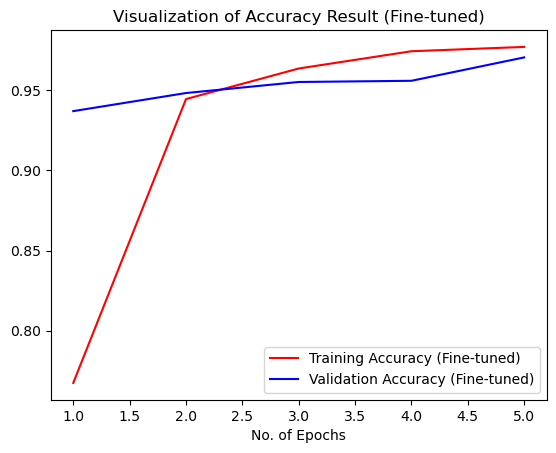

In [16]:
# Plot the accuracy history
epochs = range(1, len(fine_tune_history.history['accuracy']) + 1)
plt.plot(epochs, fine_tune_history.history['accuracy'], color='red', label='Training Accuracy (Fine-tuned)')
plt.plot(epochs, fine_tune_history.history['val_accuracy'], color='blue', label='Validation Accuracy (Fine-tuned)')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result (Fine-tuned)')
plt.legend()
plt.show()

### Predict using the fine-tuned model

In [18]:
class_names = validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [19]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Plant Diseases Dataset/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


#### Generate predictions for the test dataset

In [20]:
y_pred_fine_tune = model.predict(test_set)
predicted_categories_fine_tune = tf.argmax(y_pred_fine_tune, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 1440s 82ms/step


#### Get true categories

In [21]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

#### Classification report

In [22]:
print(classification_report(Y_true, predicted_categories_fine_tune))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       504
           1       0.98      1.00      0.99       497
           2       0.98      0.99      0.99       440
           3       0.98      1.00      0.99       502
           4       0.99      0.99      0.99       454
           5       0.99      0.98      0.98       421
           6       1.00      0.99      1.00       456
           7       0.94      0.96      0.95       410
           8       1.00      0.99      1.00       477
           9       0.97      0.95      0.96       477
          10       1.00      0.99      0.99       465
          11       0.89      1.00      0.94       472
          12       0.99      0.95      0.97       480
          13       1.00      0.95      0.97       430
          14       1.00      1.00      1.00       423
          15       1.00      0.99      1.00       503
          16       0.99      0.97      0.98       459
          17       0.97    

#### Confusion matrix

In [23]:
cm_fine_tune = confusion_matrix(Y_true, predicted_categories_fine_tune)

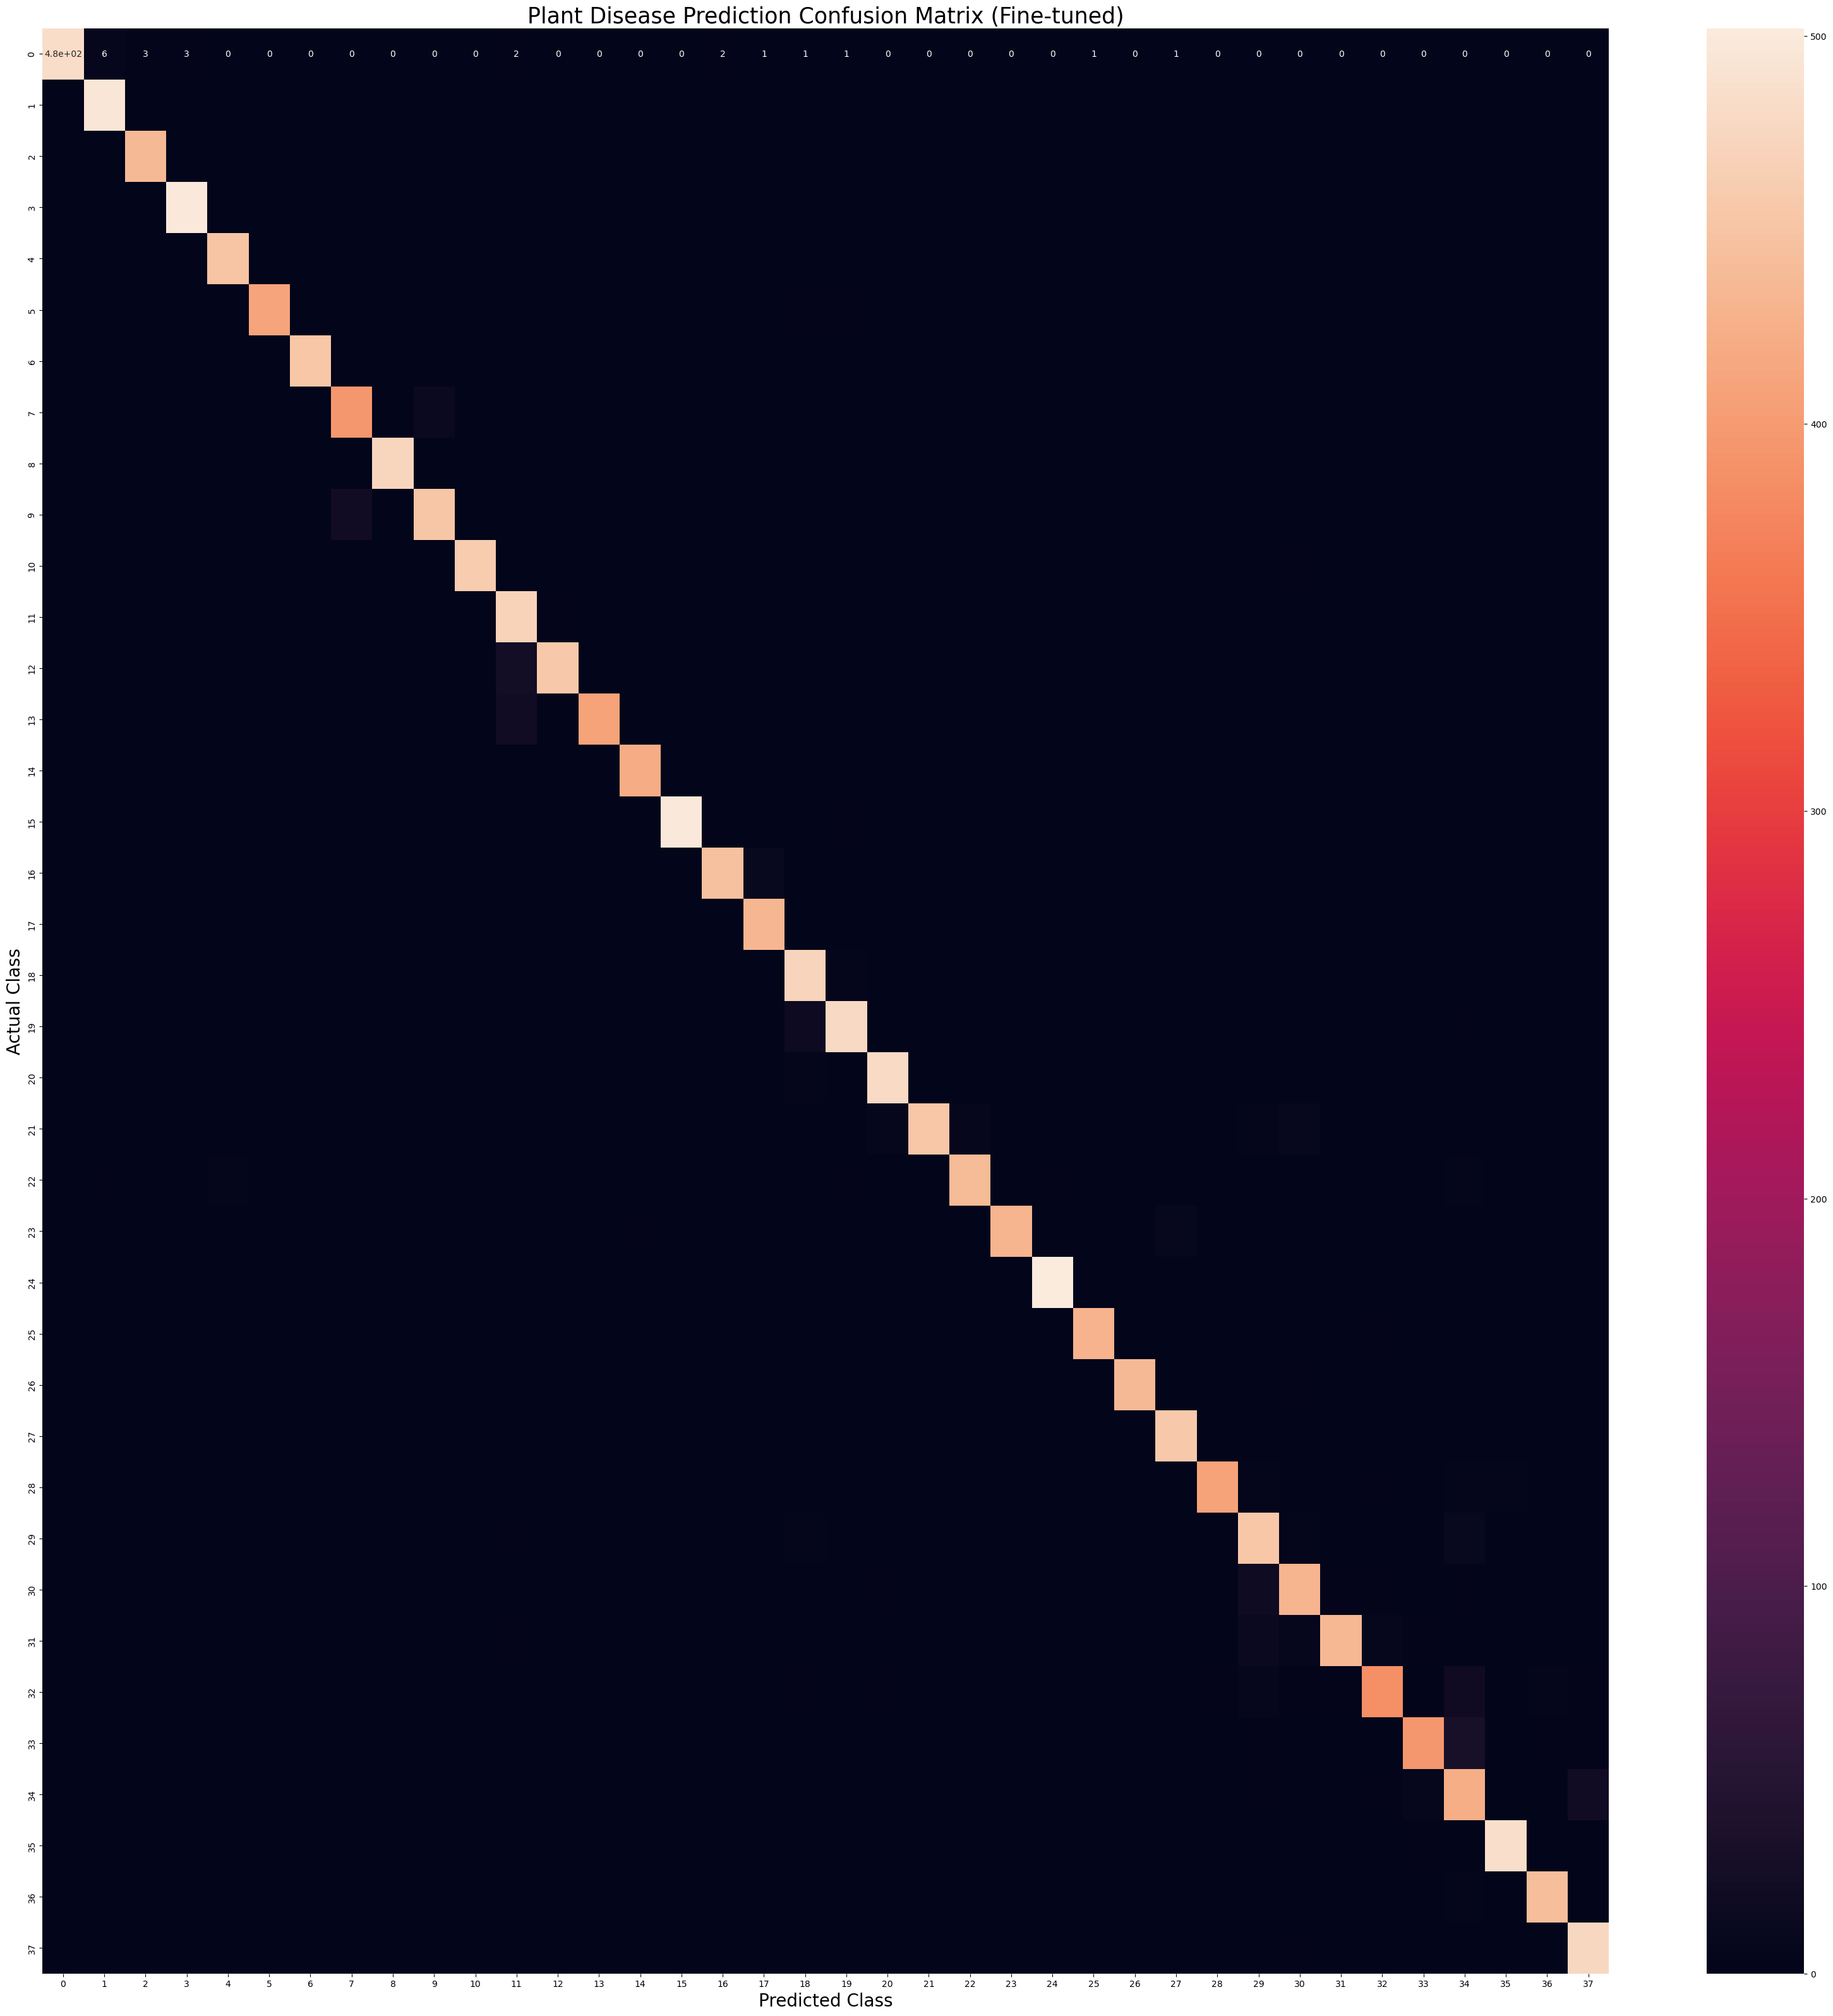

In [31]:
# Plot confusion matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cm_fine_tune, annot=True, annot_kws={"size": 10})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix (Fine-tuned)', fontsize=25)
plt.show()